# Linear Regression

Linear regression is a statistical method for modeling relationships between a dependent variable with a given set of independent variables.

This technique assumes a linear relationship between the dependent and independent variables, which implies that the dependent variable changes proportionally with changes in the independent variables. In other words, linear regression is used to determine the extent to which one or more variables can predict the value of the dependent variable.

*What do we require?*

*   Linear relationship. The linearity assumption can be tested using scatter plots.
*   Little or no multi-collinearity: It is assumed that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are not independent of each other.
*   Little or no autocorrelation: Another assumption is that there is little or no autocorrelation in the data. Autocorrelation occurs when the residual errors (the difference between what was expected and what was predicted by the model) are not independent of each other.
*   No outliers: We assume that there are no outliers in the data. Outliers are data points (jumps) that are far away from the rest of the data. Outliers can affect the results of the analysis.
*   Homoscedasticity: Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables. This property is an obligatory one for applying the Least Squares Method.
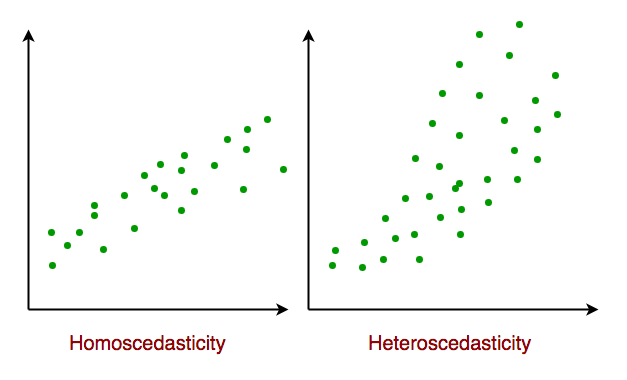

## Simple Linear Regression

Simple linear regression is an approach for predicting a response using a single independent variable. In this case, we assume that the two variables i.e. dependent and independent variables are linearly related. Hence, we try to find a linear function that predicts the response value $(y)$ as accurately as possible as a function of the independent variable $(x)$. Let us consider a dataset:

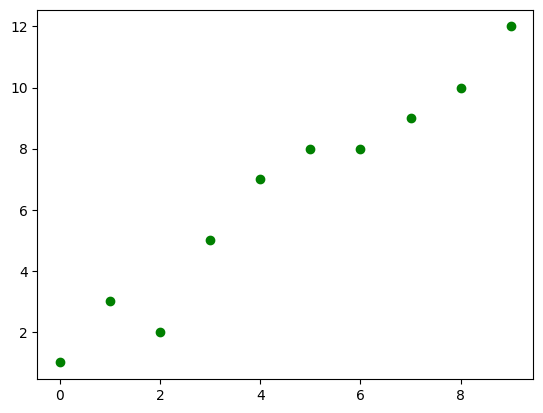

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

plt.scatter(x, y, color = 'green')
plt.show()

The equation of the regression line will be presented as: $reg(x_i) = \beta_0 + \beta_1 x_i$, where $x_i$ is an $i^{th}$ observation.

To create our model, we must “learn” or estimate the values of regression coefficients $\beta_0$ and $\beta_1$. We are going to use the principle of Least Squares. Our aim is to minimize the total residual error, which is a sum of particular errors: $$y_i = \beta_0 + \beta_1 x_i + ɛ_i = reg(x_i) + ɛ_i ⇒ ɛ_i = y_i - reg(x_i).$$

We take partial derivatives, apply the necessary extremum condition, solve the system of equations and finally get: $$\beta_0 = \overline{y} - \beta_1 \overline{x}$$ $$\beta_1 = \frac{\sum\limits_{i = 1}^n (x_i - \overline{x})(y_i - \overline{y})}{\sum\limits_{i = 1}^n (x_i - \overline{x})^2} = \frac{\sum\limits_{i = 1}^n y_i x_i - n \overline{x} \overline{y}}{\sum\limits_{i = 1}^n x_i^2 - n (\overline{x})^2}.$$
In this notation $\overline{x}$ and $\overline{y}$ are sample mean values, $n$ is the number of observations.

In [ ]:
def estimate_coef(x, y):
  # number of observations/points
  n = np.size(x)

  # mean values of random vectors x and y
  m_x = np.mean(x)
  m_y = np.mean(y)

  # calculating cross-deviation and deviation about x
  SS_xy = np.sum(y*x) - n*m_x*m_y
  SS_xx = np.sum(x*x) - n*m_x*m_x

  # calculating regression coefficients
  b_1 = SS_xy / SS_xx
  b_0 = m_y - b_1*m_x

  return (b_0, b_1)

Let's see what we got:

Regression model is: y =  1.2363636363636363  +  1.1696969696969697 x


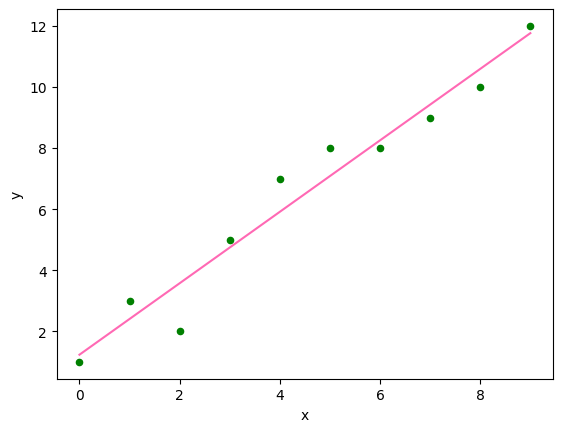

In [ ]:
def plot_regression_line(x, y, b):
  # plotting the actual points as a scatter plot
  plt.scatter(x, y, color = 'green', s = 20)

  # predicted response vector
  y_pred = b[0] + b[1]*x

  # plotting the regression line
  plt.plot(x, y_pred, color = 'hotpink')

  # putting labels
  plt.xlabel('x')
  plt.ylabel('y')

b = estimate_coef(x, y)
print("Regression model is: y = ", b[0], " + ", b[1], "x")
plot_regression_line(x, y, b)

Let's try with another data. Now we are searching for the dependency between the years of experience and the salary of an employee.

In [ ]:
import pandas as pd

dataset = pd.read_csv('Salary_Data.csv')
dataset.head()

,ExperienceYears,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


The regression model is:  26816.192244031183  +  9345.942443122372 x


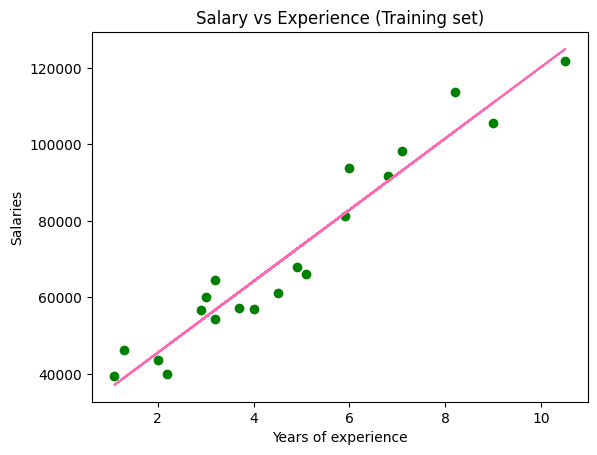

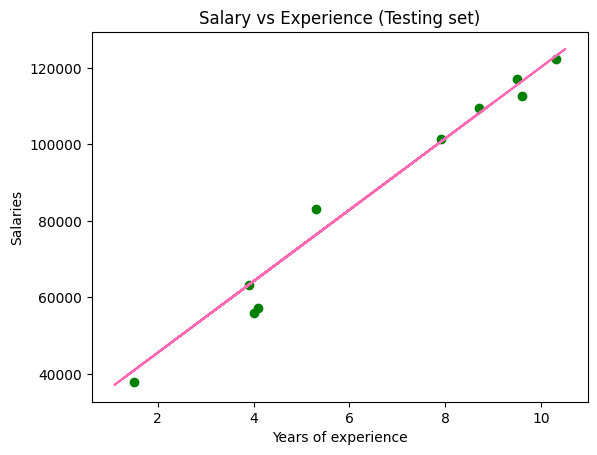

In [ ]:
X = dataset.iloc[:,:-1].values  # independent variable array, years of experience
y = dataset.iloc[:,1].values  # dependent variable vector, salary size

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
# 2/3 of our data for training and 1/3 for testing the model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) # building the model using provided algorithms

print("The regression model is: ", regressor.intercept_, " + ", regressor.coef_[0], "x")

y_pred = regressor.predict(X_test)

# PLOT FOR THE TRAINING DATA

plt.scatter(X_train, y_train, color = 'green') # plotting the observations
plt.plot(X_train, regressor.predict(X_train), color = 'hotpink') # plotting the regression line
plt.title("Salary vs Experience (Training set)") # stating the title of the graph

plt.xlabel("Years of experience") # adding the name of x-axis
plt.ylabel("Salaries") # adding the name of y-axis
plt.show()

# PLOT FOR THE TESTING DATA

plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'hotpink') # plotting the regression line
plt.title("Salary vs Experience (Testing set)")

plt.xlabel("Years of experience")
plt.ylabel("Salaries")
plt.show()

## Histogram of residuals

The Histogram of the Residual can be used to check whether the variance is normally distributed. A symmetric bell-shaped histogram which is evenly distributed around zero indicates that the normality assumption is likely to be true. If the histogram indicates that random error is not normally distributed, it suggests that the model's underlying assumptions may have been violated.

<ipython-input-150-98ba7daa3698>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals_for_training, bins = 10, color = 'hotpink', label = "Train set residuals") # you may select the no. of bins
<ipython-input-150-98ba7daa3698>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bin

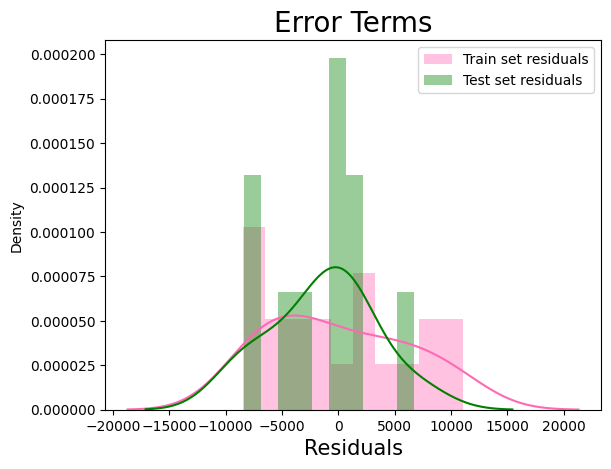

In [ ]:
residuals = y_test - y_pred
y_pred_for_training = regressor.predict(X_train)
residuals_for_training = y_train - y_pred_for_training

import seaborn as sns

sns.distplot(residuals_for_training, bins = 10, color = 'hotpink', label = "Train set residuals") # you may select the no. of bins
sns.distplot(residuals, bins = 10, color = 'green', label = "Test set residuals")
plt.title("Error Terms", fontsize = 20)
plt.xlabel("Residuals", fontsize = 15)
plt.legend()
plt.show()

## Q-Q plot

A Q-Q (quantile-quantile plot) plot is a bit more specialized than a histogram, it is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other. A point $(x, y)$ on the plot corresponds to one of the quantiles of the second distribution ($y$-coordinate) plotted against the same quantile of the first distribution ($x$-coordinate). This defines a parametric curve where the parameter is the index of the quantile interval.

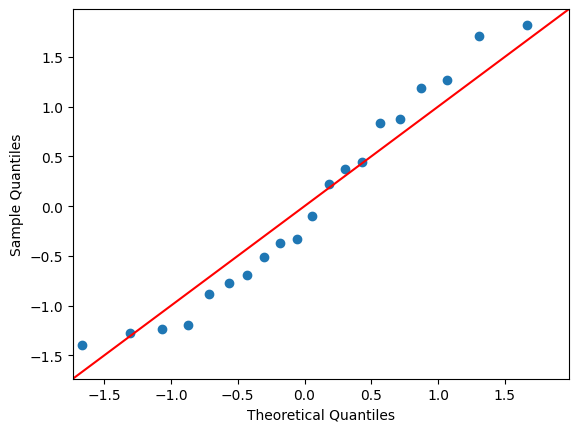

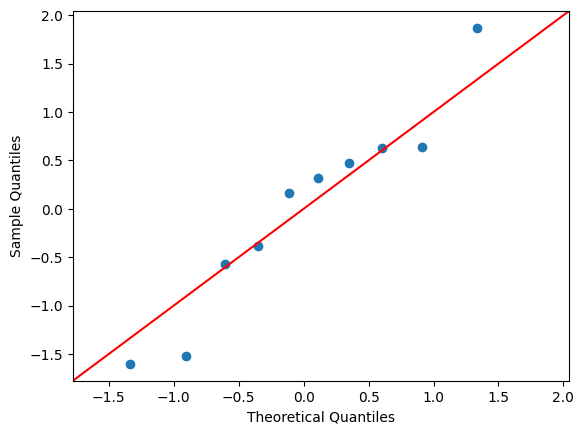

In [ ]:
import statsmodels.api as sm

sm.qqplot((residuals_for_training - residuals_for_training.mean())/residuals_for_training.std(), line = '45');
sm.qqplot((residuals - residuals.mean())/residuals.std(), line = '45');

It is visible that our residuals are not normally distributed. If they were the lines would have been placed close to each other.

Normality of residuals means that they are distributed symmetrically around zero, with no skewness or kurtosis. This assumption implies that the model captures the main patterns and sources of variation in the data, and that the errors are random and independent.

## $R^2$

$R^2$ is a coefficient of determination, the proportion of the variation in the dependent variable that is predictable from the independent variable(s).

It is a statistic used in the context of statistical models whose main purpose is either the prediction of future outcomes or the testing of hypotheses, on the basis of other related information. It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.

The most general definition of the coefficient of determination is: $$R^2 = 1 - \frac{SS_{res}}{SS_{tot}},$$ where $SS_{res} = \sum\limits_{i} ɛ_i^2$, $SS_{tot} = \sum\limits_{i} (y_i - \overline{y})^2$.

$R^2$ lies between 0 and 1. 0 means that the dependent variable cannot be explained with the help of the independent variables, 1 means that it can be fully and completely predicted by the model.

In [ ]:
r_squared = regressor.score(X_test, y_test)
r_squared_training = regressor.score(X_train, y_train)
print("For training data: ", r_squared_training, "\nFor testing data: ", r_squared)

For training data:  0.9381900012894278 
For testing data:  0.9749154407708353


## Overfitting

Overfitting occurs when a model matches the training data too closely, losing its ability to classify and predict new data. An overfit model finds many patterns, even if they are disconnected or irrelevant. The model continues to look for those patterns when new data is applied, however unrelated to the dataset. This causes the model to closely match the training data, but to become useless for new datasets.
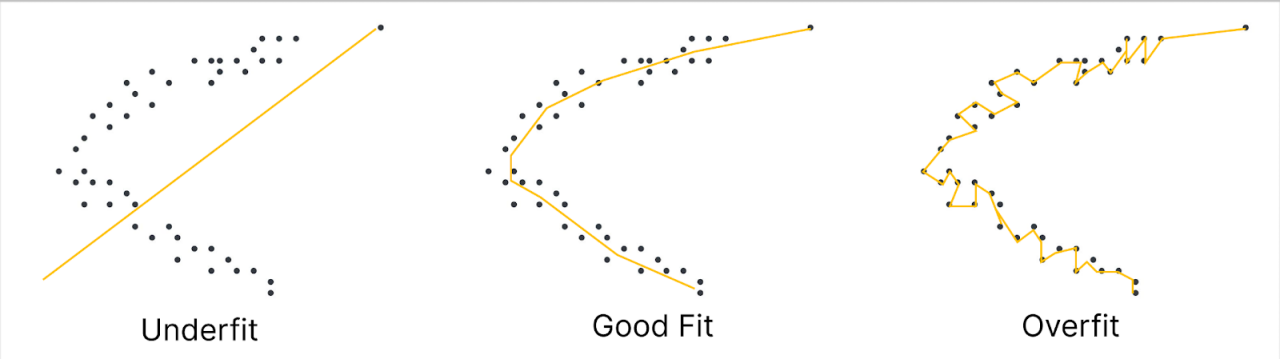

K-fold cross-validation is a common method to check if a model is overfit. The k-fold cross-validation process includes:

1. Splitting data into equally sized k “folds” or subsets;

2. Choosing a subset to be held aside as the test set;

3. Using the remaining subsets to train the model;

4. Evaluating and retaining the performance;

5. Repeating the process until all subsets have been used as a test set;

6. Finding the mean of all subset performances.

The averaged score will evaluate the performance of the model.

A simplified version of this cross-validation uses 80% of a set of data to train the learning model. The remaining 20% of that same set is used to test the accuracy of the learning model. The performance of the learning model can be measured by monitoring the percentage of accuracy in the dataset. If the training set of data performs higher than the test set it can be concluded the model is overfit.

There are several ways to stop the model from overfitting such as early stopping, adding more data,data augmentation, ensemble methods, regularization methods, etc.

Let's generate some data and see how such a problem might look like.

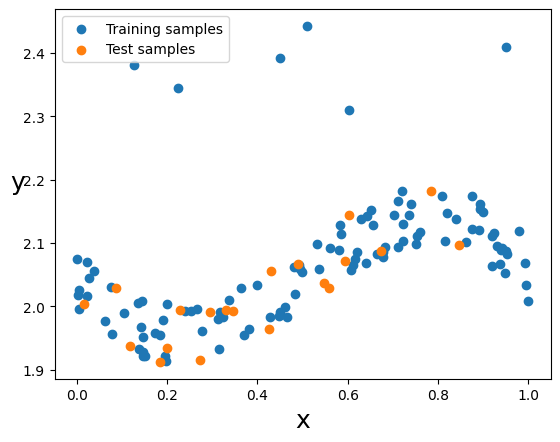

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# generate training samples
x_train = np.random.rand(100, 1)
y_train = - x_train + 3 * (x_train ** 2) - 2 * (x_train ** 3) + 2 + np.random.rand(100, 1) * 0.1

# generate some outlier points in the dataset
x_train_noise = np.random.rand(10, 1)
y_train_noise = - x_train_noise + 3 * (x_train_noise ** 2) - 2 * (x_train_noise ** 3) + 2 + np.random.rand(10, 1) * 0.5

# combine 'normal' points and 'outlier' points to a single training set
x_train = np.concatenate((x_train, x_train_noise), axis = 0)
y_train = np.concatenate((y_train, y_train_noise), axis = 0)

# generate test samples
x_test = np.random.rand(20, 1)
y_test = - x_test + 3 * (x_test ** 2) - 2 * (x_test ** 3) + 2 + np.random.rand(20, 1) * 0.1

# plot samples
plt.scatter(x_train, y_train, label = "Training samples")
plt.scatter(x_test, y_test, label = "Test samples")
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', rotation = 0, fontsize = 18)
plt.legend()

We see that a polynomial $y = a_0 + a_1 x + a_2 x^2 + a_3 x^3$ would be the best fitting model for such data. But let's try to build a classical $y = ax + b$ model and see what we get.

The regression model is:   1.9932728846351826  +  0.1501220380266597 x
Mean Squared Error for the training set:  0.008127694739960568
Mean Squared Error for the testing set:  0.0035164238418411006


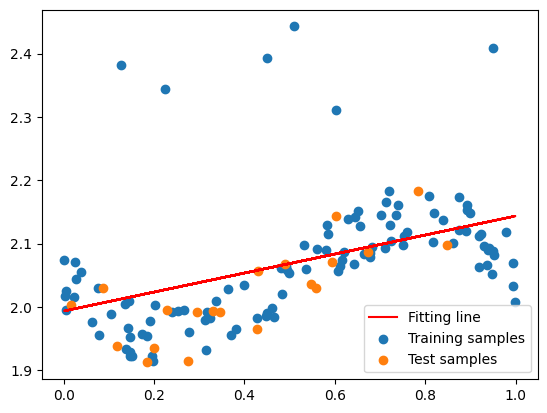

In [ ]:
# generate polynomial features
polynomial_features = PolynomialFeatures(degree = 1)
x_train_poly = polynomial_features.fit_transform(x_train)[:,1:]
x_test_poly = polynomial_features.fit_transform(x_test)[:,1:]

# create linear regression model
model = LinearRegression()

# fit model to polynomial data
model.fit(x_train_poly, y_train)

# print fitted model
print("The regression model is:  ", model.intercept_[0], " + ", model.coef_[0][0], "x")
print("Mean Squared Error for the training set: ", mean_squared_error(model.predict(x_train_poly), y_train))
print("Mean Squared Error for the testing set: ", mean_squared_error(model.predict(x_test_poly), y_test))

plt.plot(x_train, model.predict(x_train_poly), label = "Fitting line", color = 'red')
plt.scatter(x_train, y_train, label = "Training samples")
plt.scatter(x_test, y_test, label = "Test samples")
plt.legend()

Polynomial of the degree 3 will work much better:

Mean Squared Error for the training set:  0.007273931635706904
Mean Squared Error for the testing set:  0.0021899300318910272


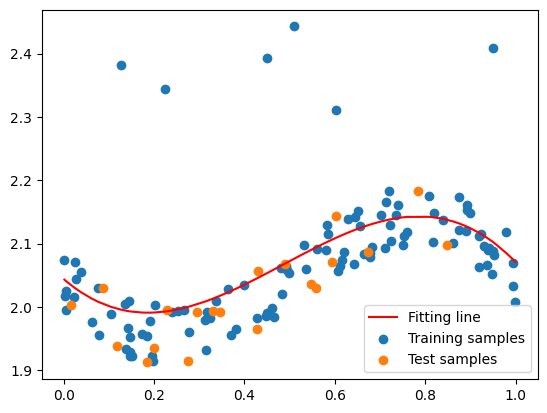

In [ ]:
# generate polynomial features
polynomial_features = PolynomialFeatures(degree = 3)
x_train_poly = polynomial_features.fit_transform(x_train)[:,1:]
x_test_poly = polynomial_features.fit_transform(x_test)[:,1:]

# create linear regression model
model = LinearRegression()

# fit model to polynomial data
model.fit(x_train_poly, y_train)

print("Mean Squared Error for the training set: ", mean_squared_error(model.predict(x_train_poly), y_train))
print("Mean Squared Error for the testing set: ", mean_squared_error(model.predict(x_test_poly), y_test))

idx = np.argsort(x_train, axis = 0)[:,0]
plt.plot(x_train[idx], model.predict(x_train_poly)[idx], label = "Fitting line", color = 'red')
plt.scatter(x_train, y_train, label = "Training samples")
plt.scatter(x_test, y_test, label = "Test samples")
plt.legend()

Let's see the polynomial of the degree 30:

Mean Squared Error for the training set:  0.005996541375714108
Mean Squared Error for the testing set:  0.004293415852644223


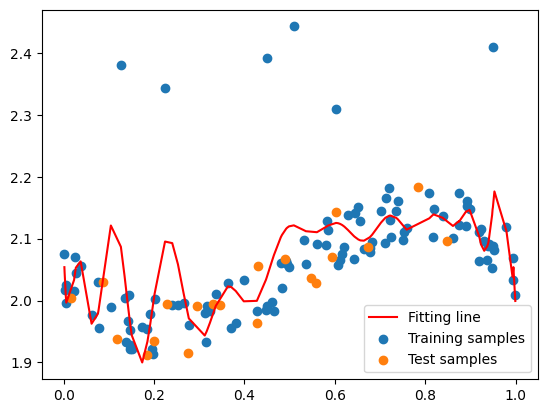

In [ ]:
# generate polynomial features
polynomial_features = PolynomialFeatures(degree = 30)
x_train_poly = polynomial_features.fit_transform(x_train)[:,1:]
x_test_poly = polynomial_features.fit_transform(x_test)[:,1:]

# create linear regression model
model = LinearRegression()

# fit model to polynomial data
model.fit(x_train_poly, y_train)

print("Mean Squared Error for the training set: ", mean_squared_error(model.predict(x_train_poly), y_train))
print("Mean Squared Error for the testing set: ", mean_squared_error(model.predict(x_test_poly), y_test))

idx = np.argsort(x_train, axis = 0)[:,0]
plt.plot(x_train[idx], model.predict(x_train_poly)[idx], label = "Fitting line", color = 'red')
plt.scatter(x_train, y_train, label = "Training samples")
plt.scatter(x_test, y_test, label = "Test samples")
plt.legend()

Of course, such a model will not accurately fit the new data.

# Multiple Linear Regression

Multiple linear regression attempts to model the relationship between two or more independent variables and one dependent variable by fitting a linear equation to the observed data. Clearly, it is nothing but an extension of a simple linear regression.

Let's consider a dataset with $p$ independent variables and one response. Also, the dataset contains $n$ rows/observations. Now we have the matrix $X$ of observations (each observation has $p$ positions) and a vector $y$ of responses: $$X = \begin{pmatrix} x_{1 1} & \ldots & x_{1 p} \\ \ldots & \ldots & \ldots \\ x_{n 1} & \ldots & x_{n p} \end{pmatrix},$$ $$y = \begin{pmatrix} y_1 \\ \ldots \\ y_n \end{pmatrix}.$$

The regression will be formed as: $y_i = \beta_0 + \beta_1 x_{i 1} + \beta_2 x_{i 2} + \ldots + \beta_p x_{i p}$. The model can be presented in a matrix form as: $y = X \beta + \varepsilon$, where $$X = \begin{pmatrix} 1 & x_{1 1} & \ldots & x_{1 p} \\ \ldots & \ldots & \ldots & \ldots \\ 1 & x_{n 1} & \ldots & x_{n p} \end{pmatrix},$$ $$\beta = \begin{pmatrix} \beta_0 \\ \ldots \\ \beta_p \end{pmatrix},$$ $$ɛ = \begin{pmatrix} ɛ_1 \\ \ldots \\ ɛ_n \end{pmatrix}.$$

Once again, we can apply the Least Squares Algorithm to determine the coefficients: $\beta = (X^T X)^{-1} X^T y$.

Let's look at the following dataset which contains the prices of the houses in Boston depending on 13 different factors.

In [ ]:
from sklearn import datasets, linear_model, metrics

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep = "\s+", skiprows = 22, header = None)

X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
# 40% of the data will be used for testing the model

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

# regression coefficients
print("Coefficients: ", reg.coef_)

# variance score: 1 means perfect prediction (variance score is similar to the R^2 score)
print("Variance score: {}".format(reg.score(X_test, y_test)))
print("Variance score: {}".format(reg.score(X_train, y_train)))

Coefficients:  [-1.03747356e-01  5.58589924e-02  5.88240770e-02  2.50523544e+00
 -1.90284888e+01  3.25353601e+00 -3.22150522e-03 -1.57603462e+00
  2.58716068e-01 -1.14681299e-02 -1.10777478e+00  5.50051783e-03
 -5.59569992e-01]
Variance score: 0.6882607142538016
Variance score: 0.7668160223286261


Let's look at the residuals:

<ipython-input-186-cbd393b65d61>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_training_residuals, bins = 15, color = 'hotpink', label = "Train set residuals")
<ipython-input-186-cbd393b65d61>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_residuals, bins = 15, color = 'green'

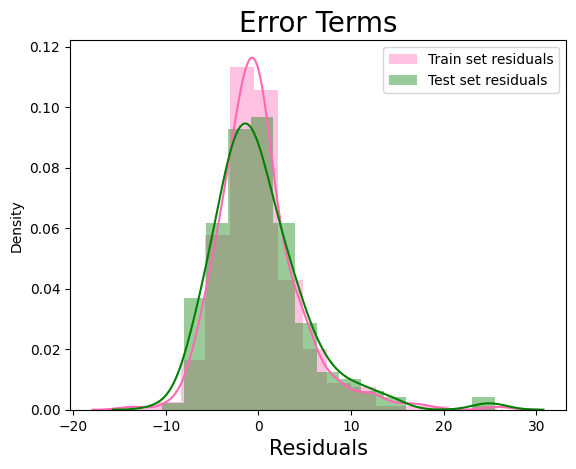

In [ ]:
boston_residuals = y_test - reg.predict(X_test)
boston_training_residuals = y_train - reg.predict(X_train)

sns.distplot(boston_training_residuals, bins = 15, color = 'hotpink', label = "Train set residuals")
sns.distplot(boston_residuals, bins = 15, color = 'green', label = "Test set residuals")
plt.legend()
plt.title("Error Terms", fontsize = 20)
plt.xlabel("Residuals", fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Test set residuals')

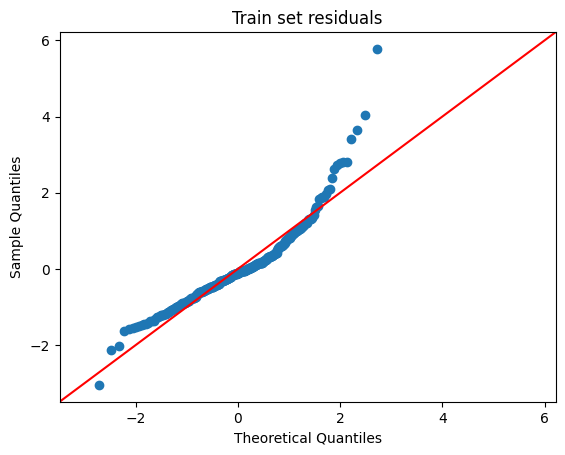

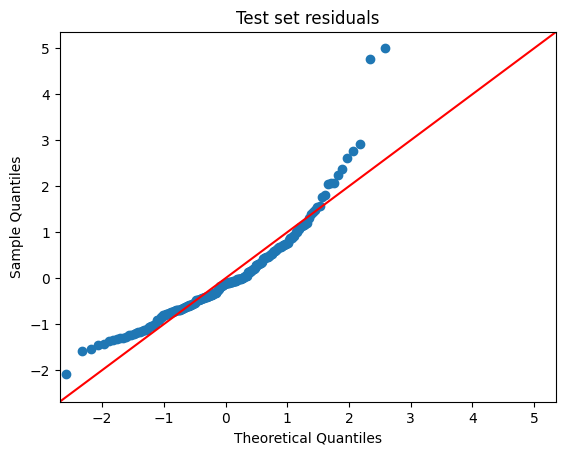

In [ ]:
sm.qqplot((boston_training_residuals - boston_training_residuals.mean())/boston_training_residuals.std(), line = '45')
plt.title("Train set residuals")
sm.qqplot((boston_residuals - boston_residuals.mean())/boston_residuals.std(), line = '45')
plt.title("Test set residuals")